## Imports
---

In [1]:
from model.model import CNet2D
from model.dataloader import NearlabDatasetLoader, NinaproDatasetLoader
from model.utils import list_files
import scipy.io
import numpy as np
import pandas as pd

In [2]:
path_nearlab = "/Users/dennisschielke/Desktop/Uni/Bachelor_Thesis/src/data/nearlab/8features/person1"
version="GLVQ"
file_paths_nearlab = list_files(path_nearlab, "csv")

In [2]:
path_ninapro = "/Users/dennisschielke/Desktop/Uni/Bachelor_Thesis/src/data/ninapro/DB2/person1"
version="GMLVQ"
file_paths_ninapro = list_files(path_ninapro, "mat")

# Evaluation
---

# What i want to evaluate

1. Accuracy overview GLVQ, GMLVQ and Softmax
    - Also keep into account which model is being used
    - Compare to standard Machine learning methods
2. Compare different number of prototypes
    - Run the algorithm for GLVQ and GMLVQ for different numbers of the prototypes and plot the difference between number and accuracy
3. Something with few-shot learning
4. Compare Confusion matrices to see where each model has its trouble
5. Graph of the accuracy per subject
6. Plot of the loss function how it decreases over each epoch
7. Plot of the model accracy
8. Table with each Layer with the following values:
    1. Average Accuracy
    2. Std
    3. Median
    4. Highest and lowest value

### 1. Accuracy with 50 epochs on each model + Plot of loss and acc

In [ ]:
model = ["Softmax", "GLVQ", "GMLVQ"]

path_results = "/Users/dennisschielke/Desktop/Uni/Bachelor_Thesis/src/results/nearlab/basicEval"
path_data = "/Users/dennisschielke/Desktop/Uni/Bachelor_Thesis/src/data/nearlab/8features"

for i in range(1,12):
    file_paths_nearlab = list_files(path_data + "/person" + str(i), "csv")
    nearlab = NearlabDatasetLoader(file_paths_nearlab[:2], file_paths_nearlab[2:])
    X_train, y_train, X_test, y_test = nearlab.load_data()
    for m in model:
        current_model = CNet2D(version=m, epochs=50)
        history = current_model.fit(X_train, y_train)
        current_model.save_history_csv(history, path_results + "/person" + str(i) + "_" + m + ".csv")
        current_model.save_model_state(path_results + "/person" + str(i) + "_" + m + ".h5")


### Playing around with GLVQ num of prototypes

In [ ]:
prototypes_per_class = [1, 2, 3, 4, 7]  


model = ["GLVQ", "GMLVQ"]

path_results = "/Users/dennisschielke/Desktop/Uni/Bachelor_Thesis/src/results/nearlab/numPrototypes"
path_data = "/Users/dennisschielke/Desktop/Uni/Bachelor_Thesis/src/data/nearlab/8features"

for i in range(1,12):
    for prot in prototypes_per_class:
        file_paths_nearlab = list_files(path_data + "/person" + str(i), "csv")
        nearlab = NearlabDatasetLoader(file_paths_nearlab[:2], file_paths_nearlab[2:])
        X_train, y_train, X_test, y_test = nearlab.load_data()
        for m in model:
            current_model = CNet2D(version=m, epochs=10)
            current_model.fit(X_train, y_train)
            current_model.save_model(path_results + "/person" + str(i) + "/" + m + "_num_" +str(prot) + ".h5")

## FSL Part

In [4]:
nearlab = NearlabDatasetLoader(file_paths_nearlab[:2], file_paths_nearlab[2:])
X_train, y_train, X_test, y_test = nearlab.load_data()
mask_train = y_train != 7
X_train_no8 = X_train[mask_train]
y_train_no8 = y_train[mask_train]

print(len(X_train_no8))
print(len(X_train))

mask_class8 = y_test == 7
X_class8 = X_test[mask_class8]
y_class8 = y_test[mask_class8]

# Train model on the first 7 classes
model = CNet2D(version="GLVQ", num_classes=7, epochs=1)
model.fit(X_train_no8, y_train_no8)


4599
5273
Batch Loss (GLVQ/GMLVQ): 0.4988
Batch Loss (GLVQ/GMLVQ): 0.5122
Batch Loss (GLVQ/GMLVQ): 0.5109
Batch Loss (GLVQ/GMLVQ): 0.5096
Batch Loss (GLVQ/GMLVQ): 0.5063
Batch Loss (GLVQ/GMLVQ): 0.5024
Batch Loss (GLVQ/GMLVQ): 0.5025
Batch Loss (GLVQ/GMLVQ): 0.5002
Batch Loss (GLVQ/GMLVQ): 0.5012
Batch Loss (GLVQ/GMLVQ): 0.4964
Batch Loss (GLVQ/GMLVQ): 0.4960
Batch Loss (GLVQ/GMLVQ): 0.4935
Batch Loss (GLVQ/GMLVQ): 0.4908
Batch Loss (GLVQ/GMLVQ): 0.4898
Batch Loss (GLVQ/GMLVQ): 0.4881
Batch Loss (GLVQ/GMLVQ): 0.4844
Batch Loss (GLVQ/GMLVQ): 0.4845
Batch Loss (GLVQ/GMLVQ): 0.4835
Batch Loss (GLVQ/GMLVQ): 0.4803
Batch Loss (GLVQ/GMLVQ): 0.4811
Batch Loss (GLVQ/GMLVQ): 0.4761
Batch Loss (GLVQ/GMLVQ): 0.4804
Batch Loss (GLVQ/GMLVQ): 0.4712
Batch Loss (GLVQ/GMLVQ): 0.4715
Batch Loss (GLVQ/GMLVQ): 0.4705
Batch Loss (GLVQ/GMLVQ): 0.4731
Batch Loss (GLVQ/GMLVQ): 0.4667
Batch Loss (GLVQ/GMLVQ): 0.4690
Batch Loss (GLVQ/GMLVQ): 0.4634
Batch Loss (GLVQ/GMLVQ): 0.4616
Batch Loss (GLVQ/GMLVQ): 0.461

{'loss': [0.4825400470031632], 'epoch': [1]}

In [5]:
prototypes = model.classifier.get_prototypes()
print(prototypes.shape)

num_classes = model.classifier.get_num_classes()
print(num_classes)

num_prototypes = model.classifier.get_num_prototypes()
print(num_prototypes)

prototype_labels = model.classifier.get_prototype_labels()
print(prototype_labels)



torch.Size([7, 50])
7
7
Parameter containing:
tensor([0, 1, 2, 3, 4, 5, 6])


In [6]:
model.add_new_class(X_class8, y_class8[0])

In [7]:
prototypes = model.classifier.get_prototypes()
print(prototypes.shape)

num_classes = model.classifier.get_num_classes()
print(num_classes)

num_prototypes = model.classifier.get_num_prototypes()
print(num_prototypes)

prototype_labels = model.classifier.get_prototype_labels()
print(prototype_labels)



torch.Size([8, 50])
8
8
Parameter containing:
tensor([0, 1, 2, 3, 4, 5, 6, 7])


FSL Epoch 1/20, Loss: 6.1801
FSL Epoch 2/20, Loss: 6.1602
FSL Epoch 3/20, Loss: 6.1412
FSL Epoch 4/20, Loss: 6.1212
FSL Epoch 5/20, Loss: 6.1021
FSL Epoch 6/20, Loss: 6.0823
FSL Epoch 7/20, Loss: 6.0626
FSL Epoch 8/20, Loss: 6.0434
FSL Epoch 9/20, Loss: 6.0240
FSL Epoch 10/20, Loss: 6.0036
FSL Epoch 11/20, Loss: 5.9830
FSL Epoch 12/20, Loss: 5.9649
FSL Epoch 13/20, Loss: 5.9428
FSL Epoch 14/20, Loss: 5.9239
FSL Epoch 15/20, Loss: 5.9051
FSL Epoch 16/20, Loss: 5.8820
FSL Epoch 17/20, Loss: 5.8646
FSL Epoch 18/20, Loss: 5.8445
FSL Epoch 19/20, Loss: 5.8222
FSL Epoch 20/20, Loss: 5.8054
Test Accuracy: 0.6931


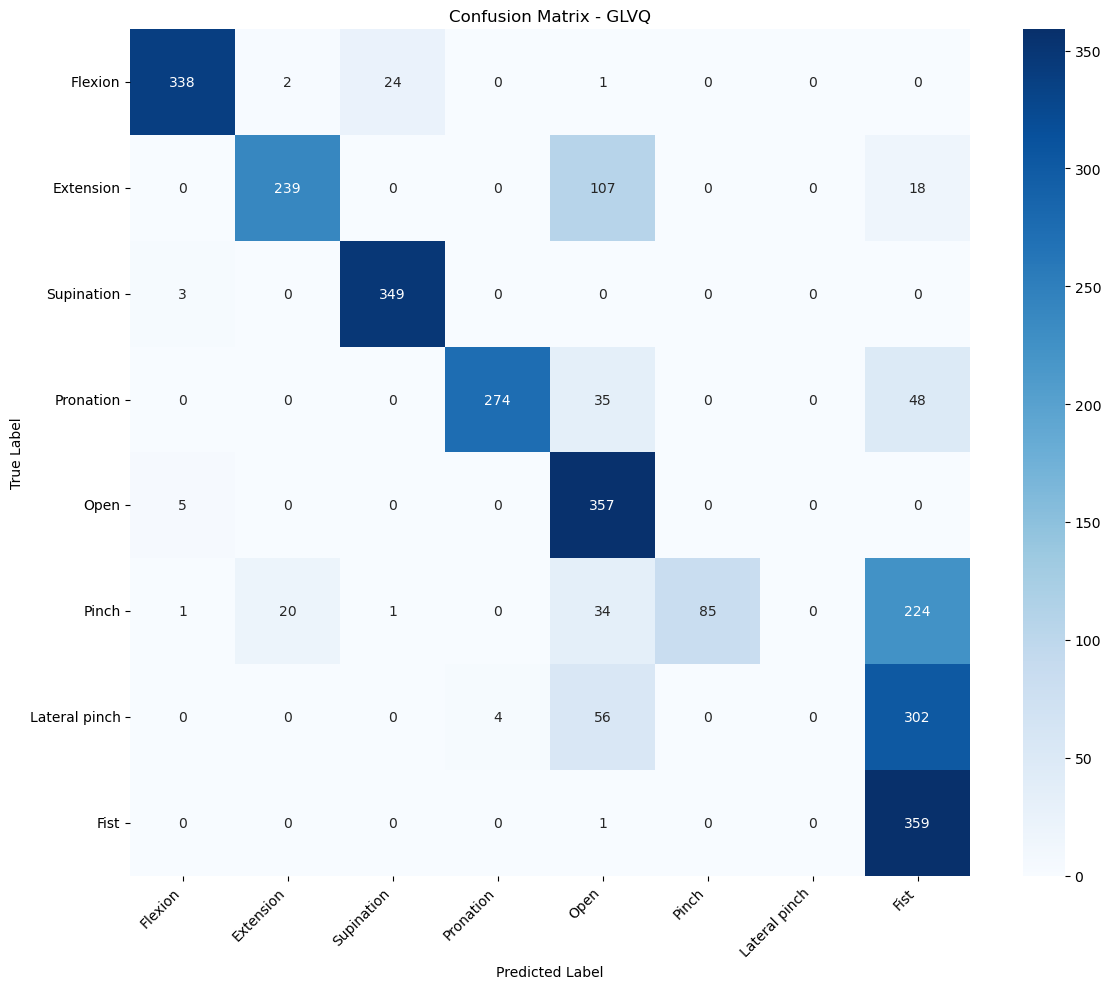


Classification Report:
               precision    recall  f1-score   support

      Flexion       0.97      0.93      0.95       365
    Extension       0.92      0.66      0.76       364
   Supination       0.93      0.99      0.96       352
    Pronation       0.99      0.77      0.86       357
         Open       0.60      0.99      0.75       362
        Pinch       1.00      0.23      0.38       365
Lateral pinch       0.00      0.00      0.00       362
         Fist       0.38      1.00      0.55       360

     accuracy                           0.69      2887
    macro avg       0.72      0.69      0.65      2887
 weighted avg       0.72      0.69      0.65      2887


Per-class Accuracy:
Flexion: 0.9260
Extension: 0.6566
Supination: 0.9915
Pronation: 0.7675
Open: 0.9862
Pinch: 0.2329
Lateral pinch: 0.0000
Fist: 0.9972


/Users/dennisschielke/miniconda3/envs/pie/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dennisschielke/miniconda3/envs/pie/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dennisschielke/miniconda3/envs/pie/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [10]:
model.optimize_new_prototypes(X_class8, y_class8, epochs=20)

# Evaluate on all classes
results = model.evaluate_model(X_test, y_test)